

# Monte Carlo (MC) Integrations and Simulations

## MC Integration: Rationale

Suppose that we wish to approximate some integral $I$ using simulations. $I$ has the form

$$
I =  \int g(x) f(x) dx
$$

where $g(x)$ is some function of a continuous r.v. $X$ and $f(x)$ is its density. We can draw a sample of size $m$ from the density $f(x)$ and then use the empirical average to get a Monte Carlo estimate of $I$:

$$
\hat{I}  = \frac{1}{m} \sum_{i=1}^{m} g(x_{i})
$$

\noindent
The standard error $\hat{se}(\hat{I})$ is given by

$$
\hat{se}(\hat{I}) = \sqrt{\frac{1}{m^{2}} \sum_{i=1}^{m} \bigg( g(x_{i}) - \hat{I} \bigg)^{2} }
$$


## MC Confidence Intervals

Clearly, we see that the larger the number of realizations $m$, the lower the standard error. Indeed, by the Law of Large Numbers (LLN), we have that 

$$\lim_{m \rightarrow \infty}\frac{1}{m} \sum_{i=1}^{m} g(x_{i}) = E_{f}[g(x)]$$


or equivalently $\lim_{m \rightarrow \infty}\hat{I} = I$. Then, by the Central Limit Theorem (CLT), we have that $\hat{I} \rightarrow N(I, se(\hat{I}))$ and the quantity \\ $\frac{\hat{I}-I}{se(\hat{I})} \sim N(0, 1)$.

We can then construct a $(1-\alpha)100 \%$ Confidence Interval for $I$

$$
\bigg[ \hat{I} - z_{1-\alpha/2} \hat{se}(\hat{I})   , \hat{I} + z_{1-\alpha/2} \hat{se}(\hat{I})   \bigg]
$$

where $z_{1-\alpha/2}$ is the $1-\alpha/2$ quantile of the standard Normal distribution.


## Working example 

Suppose that we wish to evaluate the following integral

$$
I = \int_{0}^{\pi} g(x) dx \ \ \ \ \ \ \text{where $g(x) = sin(x) + cos(x)$}
$$

We can compute it analytically and we will find that $I = 2$. Using Monte Carlo integration, we will generate $m=10,000$ realizations of $X \sim U[0, \pi]$ and then use the fact that the PDF of $X$ is 

$$
  f(x)=\begin{cases}
    1/(\pi - 0) 
 & \ \ \text{if $x \in [0, \pi]$}, \\
    0 & \ \ \text{otherwise}
  \end{cases}
$$

\noindent
In our case, we  have

$$
I = \int_{0}^{\pi} g(x) dx = \pi  \int_{0}^{\pi} g(x) \frac{1}{\pi } dx = \pi  E_{f}[g(x)] 
$$


We will implement a MC integration procedure in R and Python to approximate the integral of interest and its standard error, namely

$$
\hat{I} = \frac{\pi}{10,000} \sum_{i = 1}^{10,000} g(x_{i}) 
$$


$$
\hat{se}(\hat{I}) = \frac{\pi}{10,000} \ \sqrt{\sum_{i=1}^{10,000} \bigg( g(x_{i}) - \hat{I} \bigg)^{2} } 
$$


$95\%$-Confidence Intervals spoiler alert: The results are obviously about equivalent. These are the obtained output in R and Python respectively, rounded to 5 decimal places and using the same seed.

$$
I \in [1.94938 2.145387]
$$

$$
I \in [1.91469, 2.10769]
$$


## Example 1 in Python

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

# Define the function g(x) that we wish to integrate
def g(x):
    return np.sin(x) + np.cos(x)

# Perform the MC approximation using m = 10,000 simulations
np.random.seed(2023)

m = 10000
fx = np.random.uniform(0, np.pi, m)

# MC estimate of the integral
I_hat = ((np.pi - 0) / m) * np.sum(g(fx))
print("MC estimate of the integral:", I_hat)

# Approximation of the standard error of the MC estimate
se_I_hat = (np.pi / m) * np.sqrt(np.sum((g(fx) - I_hat)**2))
print("Approximation of the standard error:", se_I_hat)

# 95% Confidence Interval
CI = [I_hat - scipy.stats.norm.ppf(1 - 0.05/2) * se_I_hat, I_hat + scipy.stats.norm.ppf(1 - 0.05/2) * se_I_hat]
print("Confidence Interval:", CI)

MC estimate of the integral: 2.0111916600488873
Approximation of the standard error: 0.049309740888497745
Confidence Interval: [1.9145463438204295, 2.107836976277345]


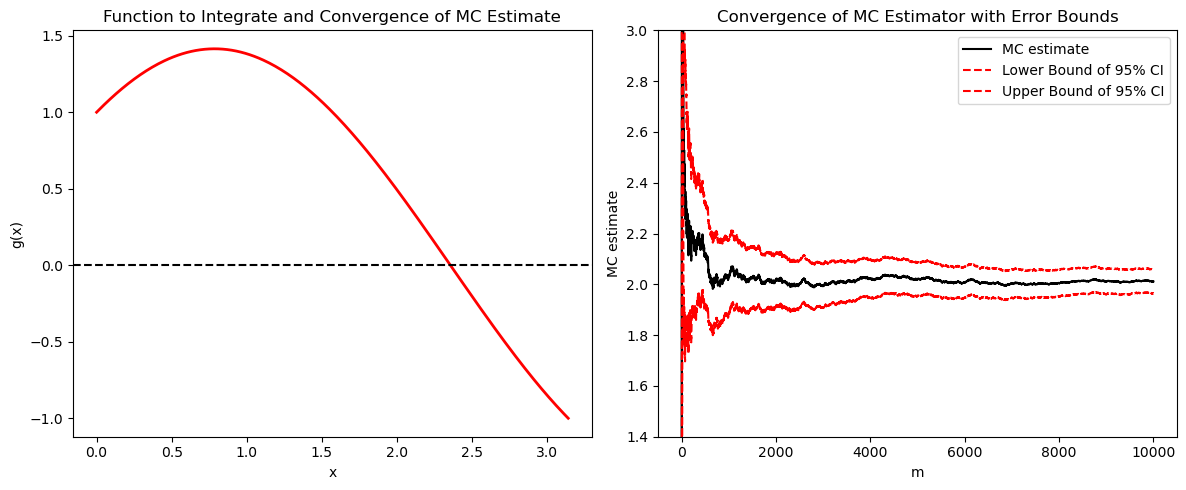

In [8]:
# Plots
plt.figure(figsize=(12, 5))

# Plot the function to integrate between 0 and pi
x_range = np.arange(0, np.pi, 0.01)
plt.subplot(1, 2, 1)
plt.plot(x_range, g(x_range), color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Function to Integrate and Convergence of MC Estimate')
plt.axhline(y=0, color='black', linestyle='--')

# Plot convergence of MC estimator with error bounds
sequence = np.arange(1, m + 1)
plt.subplot(1, 2, 2)
plt.plot(np.pi * np.cumsum(g(fx)) / sequence, label='MC estimate', color = 'black')
seI_hat = np.pi * np.sqrt(np.cumsum(g(fx)**2) / sequence - (np.cumsum(g(fx)) / sequence)**2)
plt.plot(np.pi * np.cumsum(g(fx)) / sequence - norm.ppf(1 - 0.05/2) * seI_hat / np.sqrt(sequence), linestyle='--', color='red', label='Lower Bound of 95% CI')
plt.plot(np.pi * np.cumsum(g(fx)) / sequence + norm.ppf(1 - 0.05/2) * seI_hat / np.sqrt(sequence), linestyle='--', color='red', label='Upper Bound of 95% CI')
plt.xlabel('m')
plt.ylabel('MC estimate')
plt.title('Convergence of MC Estimator with Error Bounds')
plt.ylim(1.4, 3)
plt.legend()

plt.tight_layout()
plt.show()

## MC simulations of empirical significance level

In [18]:
import numpy as np
from scipy.stats import ttest_1samp
np.random.seed(2024)
def test_data(data):
    return ttest_1samp(data, popmean=0).pvalue
X = np.random.randn(10, 100)
p_val = np.apply_along_axis(test_data, axis=1, arr=X)
print(np.mean(p_val < 0.05))

0.1
